In [54]:
import pandas as pd

url = 'https://raw.githubusercontent.com/bluenex/WekaLearningDataset/master/bank/bank-data.csv'
arquivo = pd.read_csv(url)
arquivo = arquivo.replace('NO', 0)
arquivo = arquivo.replace('YES', 1)
arquivo = arquivo.replace('FEMALE', 0)
arquivo = arquivo.replace('MALE', 1)

arquivo = arquivo.replace('SUBURBAN', 0)
arquivo = arquivo.replace('RURAL', 1)
arquivo = arquivo.replace('TOWN', 2)
arquivo = arquivo.replace('INNER_CITY', 3)

arquivo.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,0,3,17546.0,0,1,0,0,0,0,1
1,ID12102,40,1,2,30085.1,1,3,1,0,1,1,0
2,ID12103,51,0,3,16575.4,1,0,1,1,1,0,0
3,ID12104,23,0,2,20375.4,1,3,0,0,1,0,0
4,ID12105,57,0,1,50576.3,1,0,0,1,0,0,0


In [55]:
# Informações gerais sobre o dataset
print(arquivo.info())

# Descrição estatística das variáveis numéricas
print(arquivo.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    int64  
 3   region       600 non-null    int64  
 4   income       600 non-null    float64
 5   married      600 non-null    int64  
 6   children     600 non-null    int64  
 7   car          600 non-null    int64  
 8   save_act     600 non-null    int64  
 9   current_act  600 non-null    int64  
 10  mortgage     600 non-null    int64  
 11  pep          600 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 56.4+ KB
None
              age         sex      region        income     married  \
count  600.000000  600.000000  600.000000    600.000000  600.000000   
mean    42.395000    0.500000    2.081667  27524.031217    0.660000   
std     14.424947    0.50

In [56]:
print(arquivo['married'].value_counts())

married
1    396
0    204
Name: count, dtype: int64


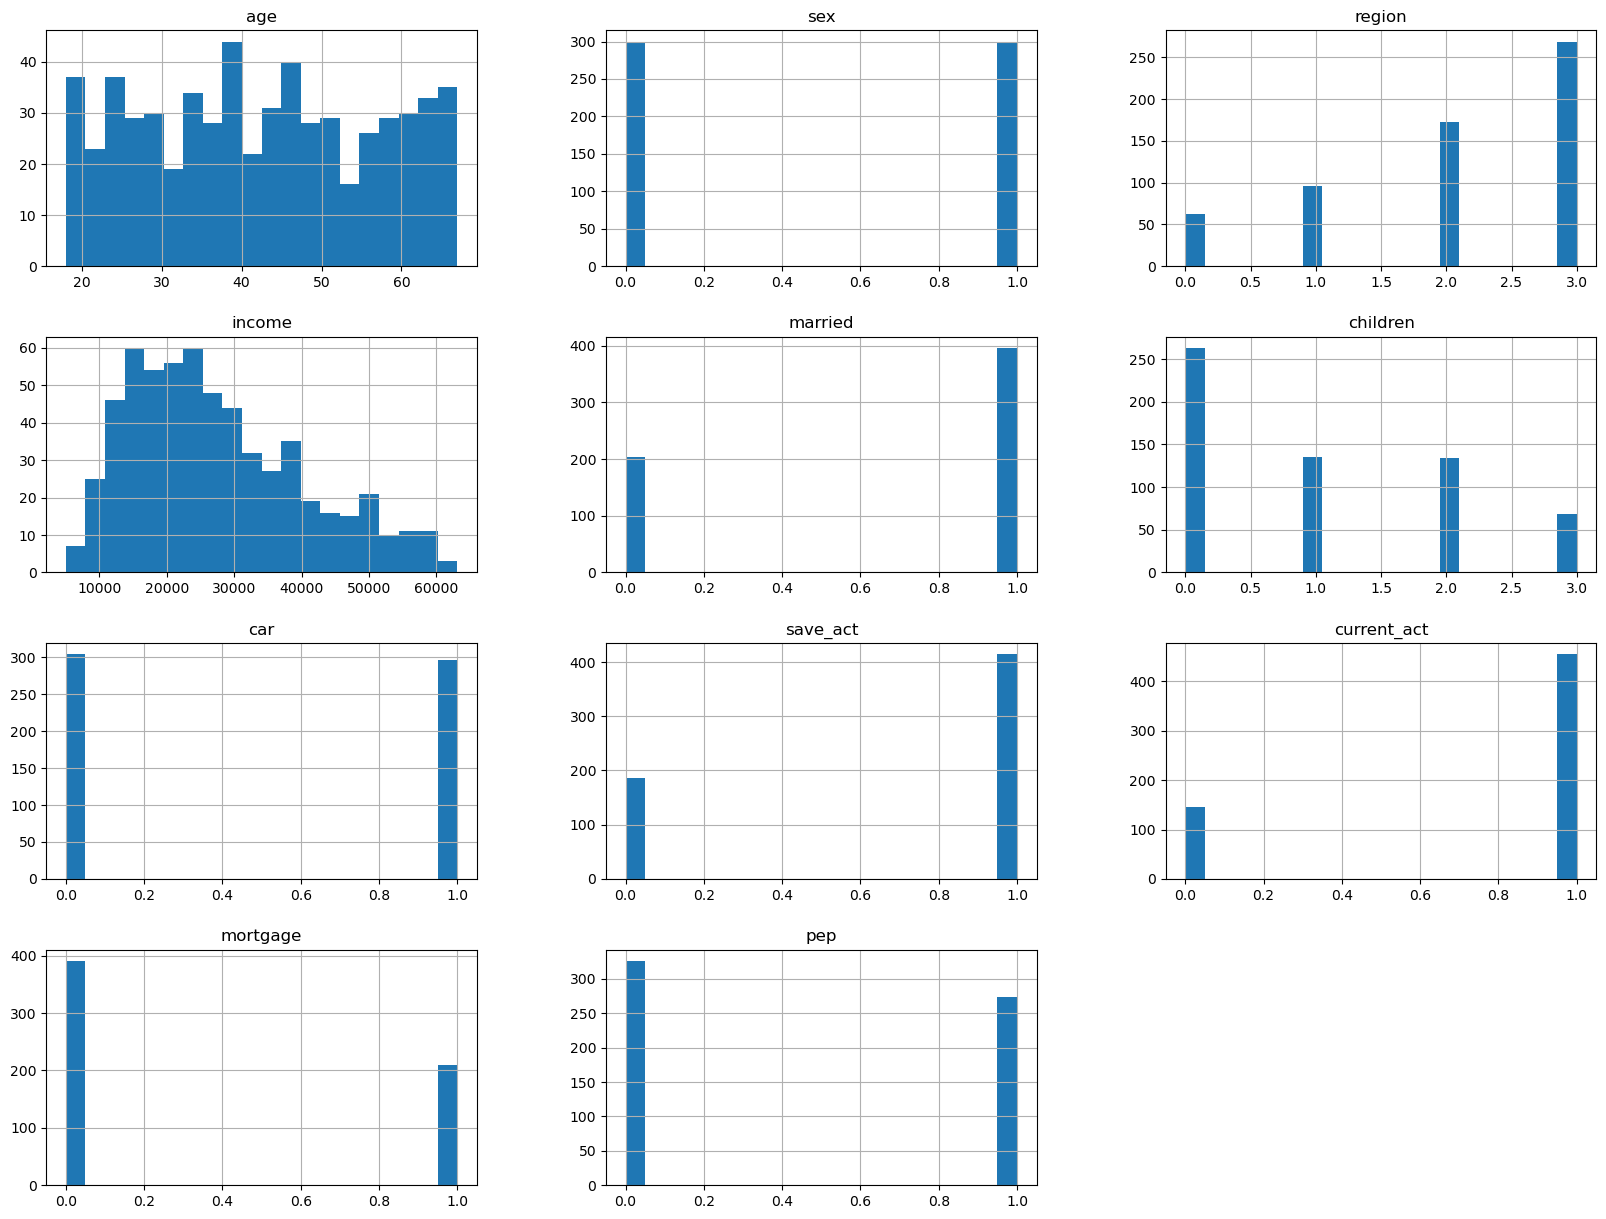

In [57]:
import matplotlib.pyplot as plt
arquivo.hist(figsize=(20, 15), bins=20)
plt.show()

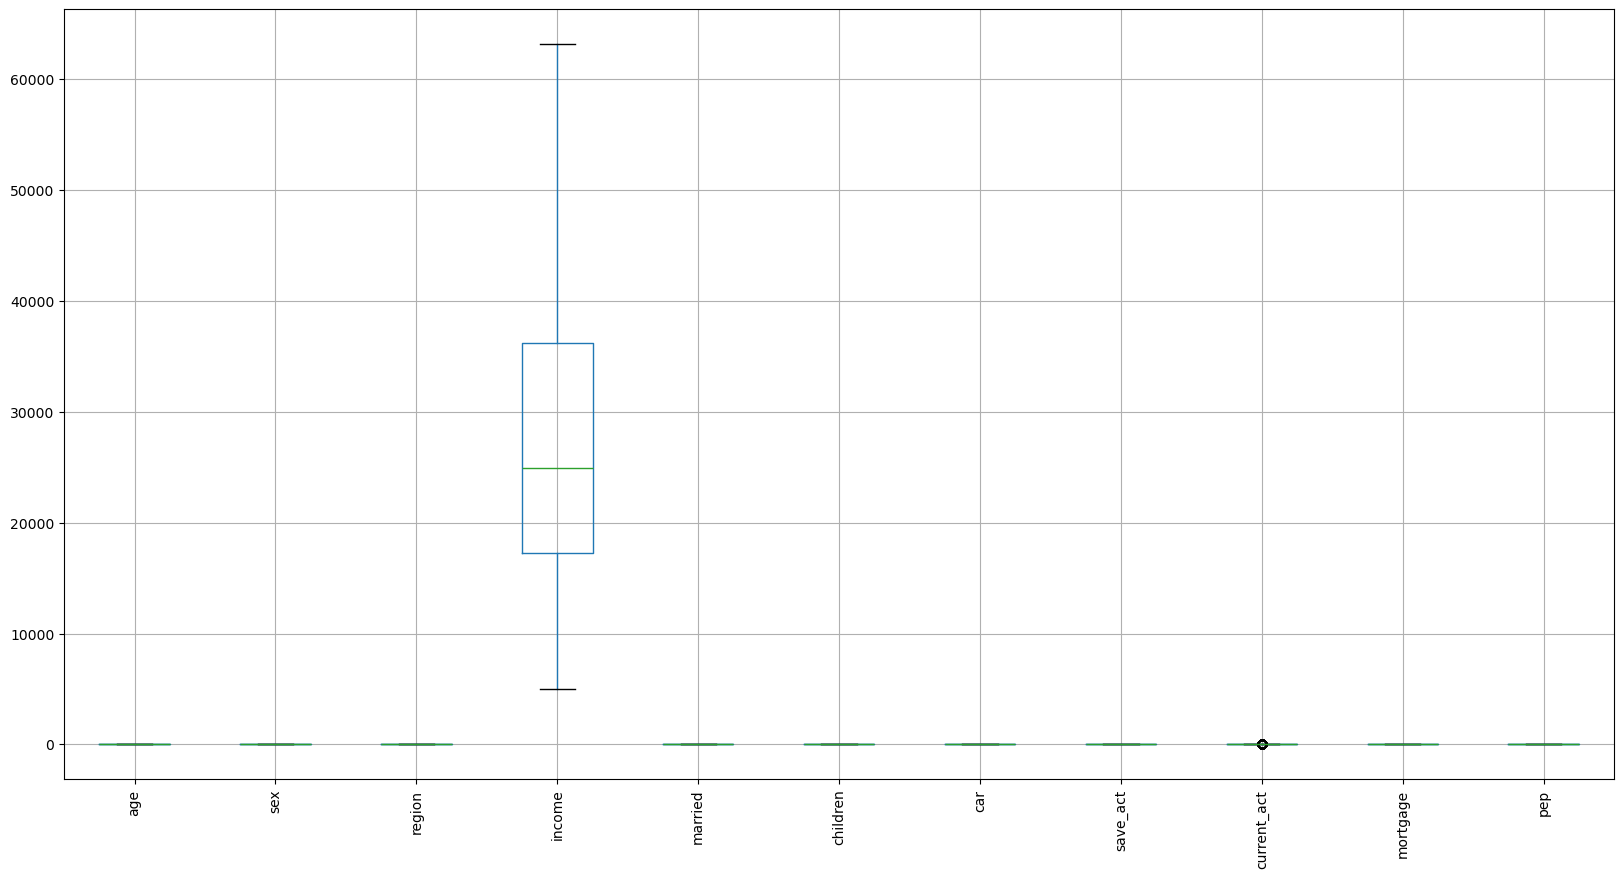

In [58]:
arquivo.boxplot(figsize=(20, 10), rot=90)
plt.show()

In [59]:
# Check if 'sex column exists in the DataFrame
if 'sex' in arquivo.columns:
    print("Column 'sex' exists in the DataFrame.")
else:
    print("Column 'sex' does not exist in the DataFrame.")
# Check if 'married' column exists in the DataFrame
if 'married' in arquivo.columns:
    print("Column 'married' exists in the DataFrame.")
else:
    print("Column 'married' does not exist in the DataFrame.")

# Display the first few rows of the DataFrame
print(arquivo.head())

Column 'sex' exists in the DataFrame.
Column 'married' exists in the DataFrame.
        id  age  sex  region   income  married  children  car  save_act  \
0  ID12101   48    0       3  17546.0        0         1    0         0   
1  ID12102   40    1       2  30085.1        1         3    1         0   
2  ID12103   51    0       3  16575.4        1         0    1         1   
3  ID12104   23    0       2  20375.4        1         3    0         0   
4  ID12105   57    0       1  50576.3        1         0    0         1   

   current_act  mortgage  pep  
0            0         0    1  
1            1         1    0  
2            1         0    0  
3            1         0    0  
4            0         0    0  


In [60]:
y = arquivo['pep']
X = arquivo.drop(['pep', 'id'], axis = 1)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming x is your feature set and y is the target variable
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
modelo = GaussianNB()
modelo.fit(x_train, y_train)

GaussianNB()

In [65]:
resultado = modelo.score(x_test, y_test)
print ("Acurácia:", resultado)

Acurácia: 0.6416666666666667


In [66]:
# Fazendo previsões
y_pred = modelo.predict(x_test)

# Calculando as métricas
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisão:", precisao)
print("Recall:", recall)
print("F1-score:", f1)

Precisão: 0.7073170731707317
Recall: 0.48333333333333334
F1-score: 0.5742574257425742


In [67]:
from sklearn.metrics import confusion_matrix, classification_report

"""
Calculando e exibindo a matriz de confusão. A orientação padrão é a seguinte:
[0,0]: Verdadeiros Negativos (VN) - Previsões corretamente identificadas como negativas.
[0,1]: Falsos Positivos (FP) - Previsões incorretamente identificadas como positivas.
[1,0]: Falsos Negativos (FN) - Previsões incorretamente identificadas como negativas.
[1,1]: Verdadeiros Positivos (VP) - Previsões corretamente identificadas como positivas.
"""

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[48 12]
 [31 29]]


In [68]:
"""
Calculando e exibindo as métricas de classificação.
Se algumas classes têm muito mais amostras do que outras, isso pode influenciar o desempenho e confiabilidade do modelo.

O "support" refere-se à quantidade de ocorrências da classe específica no conjunto de dados, sendo útil para verificar desbalanceamentos.
A "macro avg" calcula a média aritmética das métricas (precisão, recall, F1-score) para cada classe, sem considerar o número de instâncias em cada classe (support).
A "weighted avg" calcula a média ponderada das métricas para cada classe, considerando o número de instâncias em cada classe (support).
"""
print("Relatório de Classsificação:")
print(classification_report(y_test, y_pred))

Relatório de Classsificação:
              precision    recall  f1-score   support

           0       0.61      0.80      0.69        60
           1       0.71      0.48      0.57        60

    accuracy                           0.64       120
   macro avg       0.66      0.64      0.63       120
weighted avg       0.66      0.64      0.63       120



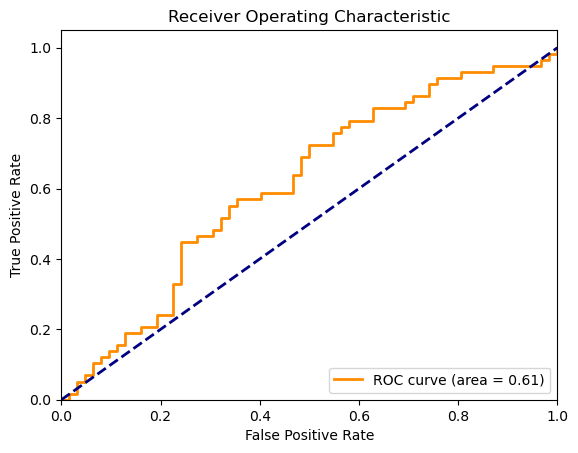

In [52]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prever as probabilidades para os dados de teste.
# Note que estamos interessados nas probabilidades da classe positiva (1), então usamos [:, 1].
y_probs = modelo.predict_proba(x_test)[:, 1]

# Calcular FPR, TPR, e limiares
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()